## California Housing Price Prediction

In [59]:
#Importing Required libraries
import pandas as pd
import numpy as np
from datetime import timedelta as dt
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler
warnings.filterwarnings("ignore")

### Data Import and Exploration

In [2]:
data = pd.read_excel('ca_housing.xlsx')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
#Looks like total_bedrooms column has null values, lets have a look at it

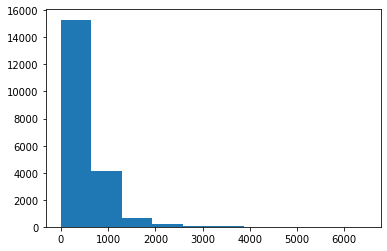

In [8]:
plt.hist(data['total_bedrooms'])
plt.show()

In [9]:
#using simple imputer to deal with null values and using median stra

In [10]:
imputer = SimpleImputer(strategy='mean',missing_values=np.nan)
data['total_bedrooms']= imputer.fit_transform(data[['total_bedrooms']])
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [14]:
#Lets have a look at ocean_proximity feature 

In [15]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

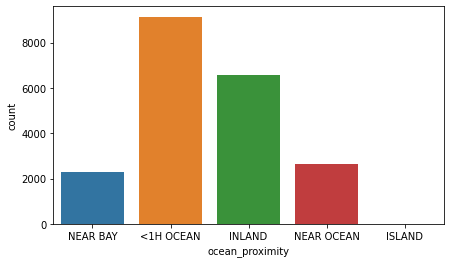

In [16]:
plt.figure(figsize=(7,4))
sns.countplot(data=data,x='ocean_proximity')

<AxesSubplot:>

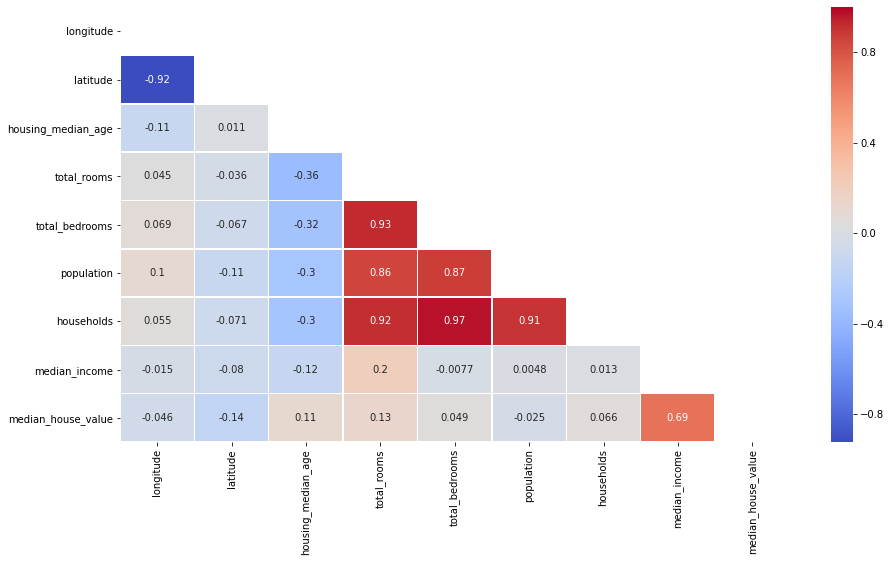

In [17]:
plt.figure(figsize=(15,8))
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), linewidths=.5,annot=True,mask=mask,cmap='coolwarm')

Total bedrooms, total rooms, housholds and populations are highly correlated. We can create new columns for more insights.

In [18]:
#getting more insights into data by creating extra columns 
data['household_per_person'] = data['households']/data['population']
data['rooms_per_household'] = data['total_rooms']/data['households']

data2 = data.drop(columns = ['total_rooms','population','households'])


In [19]:
data2.head()

,longitude,latitude,housing_median_age,total_bedrooms,median_income,median_house_value,ocean_proximity,household_per_person,rooms_per_household
0,-122.23,37.88,41,129.0,8.3252,452600,NEAR BAY,0.391304,6.984127
1,-122.22,37.86,21,1106.0,8.3014,358500,NEAR BAY,0.473969,6.238137
2,-122.24,37.85,52,190.0,7.2574,352100,NEAR BAY,0.356855,8.288136
3,-122.25,37.85,52,235.0,5.6431,341300,NEAR BAY,0.392473,5.817352
4,-122.25,37.85,52,280.0,3.8462,342200,NEAR BAY,0.458407,6.281853


<AxesSubplot:>

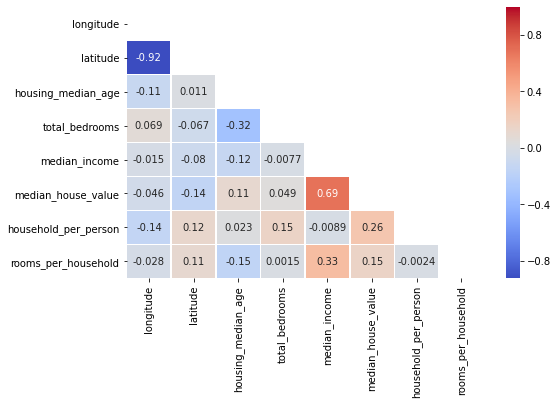

In [20]:
plt.figure(figsize=(8,5))
corr = data2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data2.corr(), linewidths=.5,annot=True,mask=mask,cmap='coolwarm')

In [21]:
# Longitude and latitude are highly correlated. so we gonna drop longitude
#Also, ocean_proximity is categorical variable so we need to make dummies after scaling the data
data3 = data2.drop(columns=['longitude','ocean_proximity'])

<AxesSubplot:>

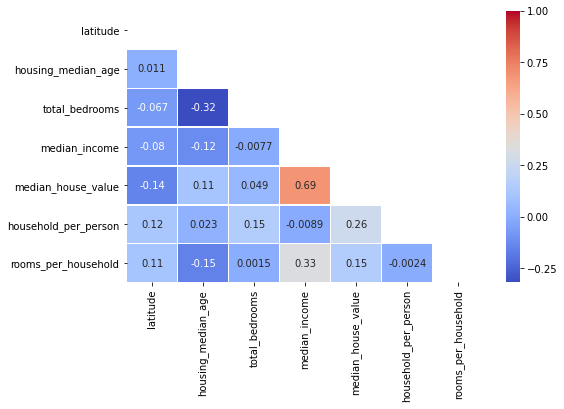

In [22]:
plt.figure(figsize=(8,5))
corr = data3.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data3.corr(), linewidths=.5,annot=True,mask=mask,cmap='coolwarm')

In [23]:
data3.describe()

,latitude,housing_median_age,total_bedrooms,median_income,median_house_value,household_per_person,rooms_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,28.639486,537.870553,3.870671,206855.816909,0.364254,5.429000
std,2.135952,12.585558,419.266592,1.899822,115395.615874,0.093364,2.474173
min,32.540000,1.000000,1.000000,0.499900,14999.000000,0.000804,0.846154
25%,33.930000,18.000000,297.000000,2.563400,119600.000000,0.304668,4.440716
50%,34.260000,29.000000,438.000000,3.534800,179700.000000,0.354847,5.229129
75%,37.710000,37.000000,643.250000,4.743250,264725.000000,0.411566,6.052381
max,41.950000,52.000000,6445.000000,15.000100,500001.000000,1.444444,141.909091


<AxesSubplot:>

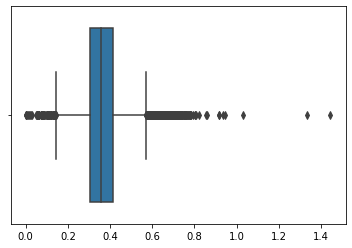

In [24]:
sns.boxplot(data3[['household_per_person']])

In [25]:
data3 = data3.loc[data3["household_per_person"]<1.0,:]

<AxesSubplot:xlabel='household_per_person'>

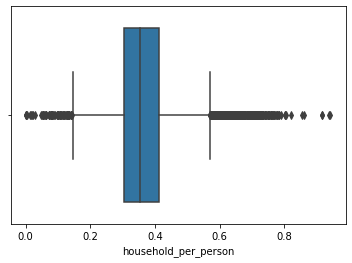

In [26]:
sns.boxplot(data3['household_per_person'])

In [27]:
data3.shape

(20637, 7)

<AxesSubplot:>

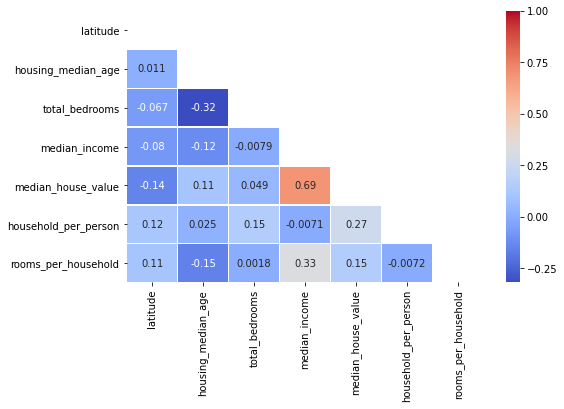

In [28]:
plt.figure(figsize=(8,5))
corr = data3.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data3.corr(), linewidths=.5,annot=True,mask=mask,cmap='coolwarm')

array([[<AxesSubplot:title={'center':'household_per_person'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'rooms_per_household'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

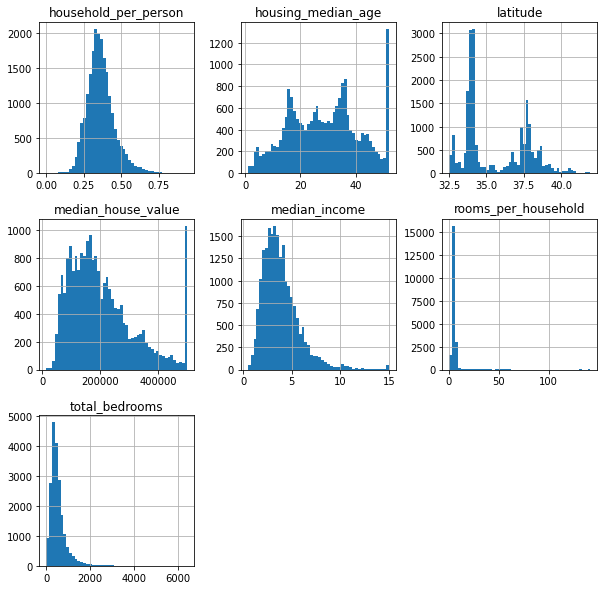

In [29]:
data3[data3.columns].hist(bins=50, figsize=(10, 10))

<AxesSubplot:xlabel='rooms_per_household'>

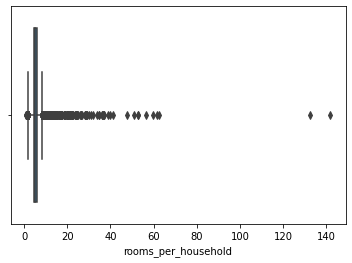

In [30]:
sns.boxplot(data3['rooms_per_household'])

In [31]:
#sns.distplot(data3['bedrooms_in_rooms'])

In [32]:
data3 = data3.loc[data3["rooms_per_household"]<15,:]

<AxesSubplot:xlabel='rooms_per_household'>

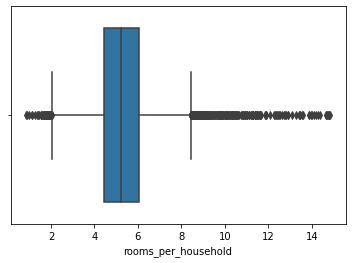

In [33]:
sns.boxplot(data3['rooms_per_household'])

In [34]:
data3['total_bedrooms'] = np.sqrt(data3['total_bedrooms'])

<AxesSubplot:xlabel='total_bedrooms'>

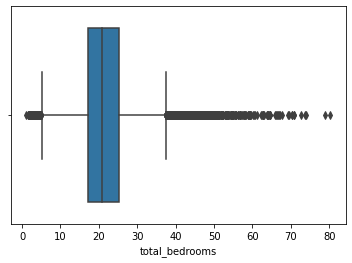

In [35]:
sns.boxplot(data3['total_bedrooms'])

<AxesSubplot:>

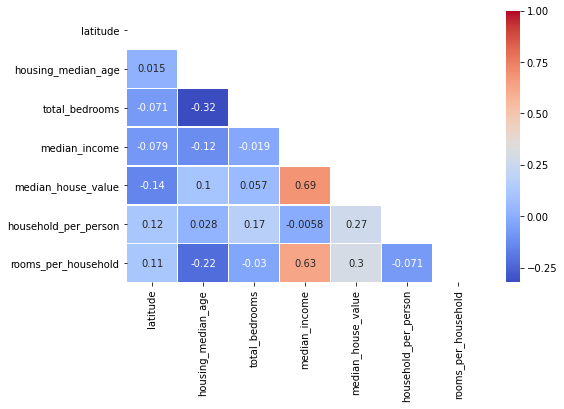

In [36]:
plt.figure(figsize=(8,5))
corr = data3.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data3.corr(), linewidths=.5,annot=True,mask=mask,cmap='coolwarm')

In [37]:
data_new = data3.drop(columns=['median_house_value'])
target = data3['median_house_value']

In [39]:
data_new['ocean_proximity'] = data2['ocean_proximity']

In [40]:
data_new.describe()

,latitude,housing_median_age,total_bedrooms,median_income,household_per_person,rooms_per_household
count,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000,20529.000000
mean,35.622006,28.700083,21.911357,3.871793,0.363840,5.311576
std,2.131495,12.578193,7.561472,1.899915,0.092695,1.318862
min,32.540000,1.000000,1.000000,0.499900,0.000804,0.846154
25%,33.930000,18.000000,17.233688,2.562500,0.304487,4.436647
50%,34.250000,29.000000,20.928450,3.535300,0.354352,5.222458
75%,37.710000,37.000000,25.337719,4.746300,0.411141,6.034247
max,41.950000,52.000000,80.280757,15.000100,0.942857,14.851852


In [41]:
new_df = pd.get_dummies(data_new , columns = ['ocean_proximity'], drop_first=True)

In [42]:
new_df

,latitude,housing_median_age,total_bedrooms,median_income,household_per_person,rooms_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,37.88,41,11.357817,8.3252,0.391304,6.984127,0,0,1,0
1,37.86,21,33.256578,8.3014,0.473969,6.238137,0,0,1,0
2,37.85,52,13.784049,7.2574,0.356855,8.288136,0,0,1,0
3,37.85,52,15.329710,5.6431,0.392473,5.817352,0,0,1,0
4,37.85,52,16.733201,3.8462,0.458407,6.281853,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
20635,39.48,25,19.339080,1.5603,0.390533,5.045455,1,0,0,0
20636,39.49,18,12.247449,2.5568,0.320225,6.114035,1,0,0,0
20637,39.43,17,22.022716,1.7000,0.429990,5.205543,1,0,0,0
20638,39.43,18,20.223748,1.8672,0.470985,5.329513,1,0,0,0


In [43]:
scale = RobustScaler()
std = StandardScaler()

In [44]:
new_df['latitude'],new_df['housing_median_age'] = std.fit_transform(new_df[['latitude']]), \
                                                        std.fit_transform(new_df[['housing_median_age']])


In [45]:
new_df.shape

(20529, 10)

In [46]:
target.shape

(20529,)

### Linear Regression

In [47]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest, ytrain, ytest = train_test_split(new_df, target , random_state=42, test_size=0.25)

In [48]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(Xtrain,ytrain)
ypred = LR.predict(Xtest)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
print("Mean Squared Error : {}".format(mse))
print("Root Mean Squared Error : {}".format(rmse))
print("Training score :", LR.score(Xtrain, ytrain))
print("R squared :",r2_score(ytest, ypred))

Mean Squared Error : 4425446309.553727
Root Mean Squared Error : 66524.02806169908
Training score : 0.6581894432939344
R squared : 0.6750121947213781


In [50]:
from sklearn.model_selection import cross_validate
scores = cross_validate(LR,Xtest, ytest,  cv=5)
scores

{'fit_time': array([0.00554585, 0.00499082, 0.00464201, 0.00412416, 0.00492907]),
 'score_time': array([0.00329208, 0.00251007, 0.00267792, 0.00280499, 0.00224495]),
 'test_score': array([0.64060681, 0.63389055, 0.71956703, 0.67797944, 0.68964602])}

### RandomForest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=5, random_state = 42,n_estimators=200 )

Xtrain2 , Xtest2, ytrain2, ytest2 = train_test_split(new_df, target , random_state=42, test_size=0.25)


RF.fit(Xtrain2,ytrain2)
ypred2 = RF.predict(Xtest2)

In [57]:
mse = mean_squared_error(ytest2, ypred2)
rmse = np.sqrt(mse)

# evaluating the model
print("Mean Squared Error : {}".format(mse))
print("Root Mean Squared Error : {}".format(rmse))
print("Training Score :", RF.score(Xtrain2, ytrain2))
print("R squared :",r2_score(ytest2, ypred2))


Mean Squared Error : 3966296340.012039
Root Mean Squared Error : 62978.538725601116
Training Score : 0.7031278062189092
Testing Score : 0.7087304076331389
R squared : 0.7087304076331389


In [53]:
from sklearn.model_selection import cross_validate
scores = cross_validate(RF,Xtest2, ytest2,  cv=5)
scores

{'fit_time': array([1.22291875, 1.21005273, 1.22871661, 1.21511889, 1.23173308]),
 'score_time': array([0.01772428, 0.01534104, 0.01599121, 0.01517224, 0.01699018]),
 'test_score': array([0.68907221, 0.68735954, 0.75593616, 0.69768659, 0.71786112])}

### Comparison Table for regression models

<table>
  <thead>
    <tr>
      <th>Linear Regression</th>
      <th>Random Forest Regressor</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Mean Squared Error : 4425446309.55</td>
      <td>Mean Squared Error : 3966296340.01</td>
    </tr>
    <tr>
      <td>Root Mean Squared Error : 66524.02</td>
      <td>Root Mean Squared Error : 62978.53</td>
    </tr>
    <tr>
      <td>R squared : 0.67</td>
      <td>R squared : 0.70</td>
    </tr>
  </tbody>
</table>
